In [2]:
#Manual Input
'''
import json

gene_type = input('Input pr or rt: ')
seq_n = input('Which sequence number? Input integer: ')

json_data = open('files/{}/{}/{}_seqid.json'.format(gene_type,seq_n,seq_n), 'r')
jdata = json.loads(json_data.read())
options = jdata[0]['alignedGeneSequences'][0]['prettyPairwise'].keys()
print('Your options:')
for k in options:
    print(k)
selection = input('Input one of the above: ')
res = jdata[0]['alignedGeneSequences'][0]['prettyPairwise'][selection]
print(res)
'''

Input pr or rt:  Pr
Which sequence number? Input integer:  8


Your options:
positionLine
refAALine
alignedNAsLine
mutationLine


Input one of the above:  alignedNAsLine


['CCT', 'CAA', 'ATC', 'ACT', 'CTT', 'TGG', 'CAA', 'CGA', 'CCC', 'CTC', 'GTC', 'TCA', 'ATA', 'AAG', 'ATA', 'GGG', 'GGG', 'CAA', 'GTA', 'AAG', 'GAA', 'GCT', 'CTA', 'TTA', 'GAT', 'ACA', 'GGA', 'GCA', 'GAT', 'GAT', 'ACA', 'GTA', 'TTA', 'GAA', 'GAC', 'ATG', 'ACT', 'TTG', 'CCA', 'GGA', 'AGA', 'TGG', 'AAA', 'CCA', 'AAA', 'ATG', 'ATA', 'GGG', 'GGA', 'ATT', 'GGA', 'GGT', 'TTT', 'ATC', 'AAA', 'GTA', 'AGA', 'CAG', 'TAT', 'GAT', 'CAG', 'ATA', 'GAA', 'MTA', 'GAM', 'ATC', 'TGT', 'GGA', 'CAT', 'AAA', 'GCT', 'ATA', 'GGT', 'ACA', 'GTA', 'TTA', 'GTA', 'GGA', 'CCT', 'ACA', 'CCT', 'GTC', 'AAC', 'ATA', 'ATT', 'GGA', 'AGA', 'AAT', 'CTG', 'TTG', 'ACT', 'CAG', 'ATT', 'GGT', 'TGC', 'ACT', 'TTA', 'AAT', 'TTT']


In [ ]:
'''
TODO: Refactor to work with all seq types, ALL RESPONSE TYPES.
'''

In [6]:
%pylab inline
import pandas as pd
import json

Populating the interactive namespace from numpy and matplotlib


In [25]:
'''Load ALL the data:'''
data = pd.concat([pd.read_csv('training_data.csv'),pd.read_csv('test_data.csv')])
data = data.dropna(how='any').reset_index(drop=True)

gene_types = ['pr','rt']

for gt in gene_types:
    mutations = []
    for i in range(len(data)):
        json_data = open('files/{}/{}/{}_seqid.json'.format(gt,i,i), 'r')
        jdata = json.loads(json_data.read())
        selection = 'mutationLine'
        res = jdata[0]['alignedGeneSequences'][0]['prettyPairwise'][selection]
        mutations.append(res)
    data = pd.concat([data,pd.Series(mutations, name='{}_muts'.format(gt))], axis=1)

no_resp_df = data[data['Resp']==0]
resp_df = data[data['Resp']==1]

FileNotFoundError: [Errno 2] No such file or directory: 'files/pr/1425/1425_seqid.json'

In [24]:
data['Resp'].value_counts()

0    733
H    692
Name: Resp, dtype: int64

In [ ]:
#for each mutation location
#only on Resp=0
#find most common.

In [11]:
def query_muts(query):
    
    query=query.strip().lower()
    
    percentage_list = []

    for pos,count in enumerate(muts_freqs):
        muts = [mut.strip().lower() for mut in count.index]
        freqs = count.values
        l = sum(freqs)
        freqs = [np.round((f/l)*100,2) for f in freqs]

        try:
            res = dict(zip(muts,freqs))[query]
            percentage_list.append(res)
        except:
            percentage_list.append(0.0)
    return percentage_list

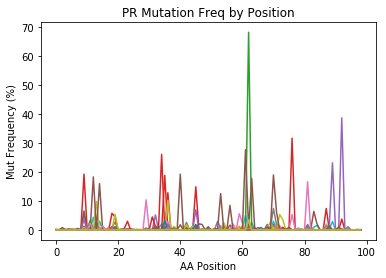

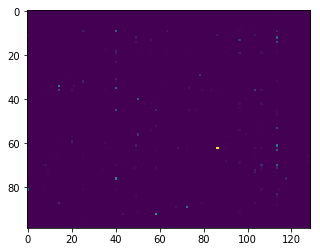

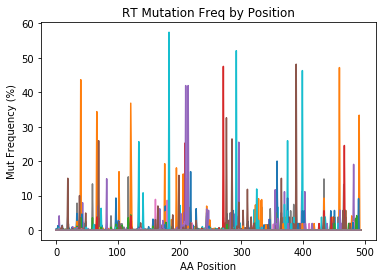

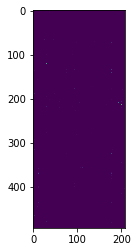

In [20]:
for g in gene_types:
    muts_no_resp = no_resp_df['{}_muts'.format(g)]
    muts_map = {}
    all_muts = set()

    for muts_list in muts_no_resp:
        for idx,mut in enumerate(muts_list):
            all_muts.add(mut)
            try:
                muts_map[idx].append(mut)
            except:
                mut_record =[mut]
                muts_map[idx]=mut_record
    
    muts_freqs = [pd.Series(muts_map[k]).value_counts() for k in sorted(muts_map.keys())]
    
    for mut in all_muts:
        if mut != ' - ':
            plt.plot(query_muts(mut))
    plt.xlabel('AA Position')
    plt.ylabel('Mut Frequency (%)')
    plt.title('{} Mutation Freq by Position'.format(g.upper()))
    plt.show()
    plt.close()
    
    cols = sorted([l.strip() for l in all_muts if l != ' - '])
    mut_df = pd.concat([pd.Series(query_muts(c)) for c in cols], axis=1)
    mut_df.columns = cols
    mut_df.to_csv('{}_muts.csv'.format(g))
    heatmap_values = mut_df.values
    plt.imshow(heatmap_values)
    plt.show()
    plt.close()

In [ ]:
'''TODO'''
#Clean up/streamline code
#Unify all the code into one notebook.
#Spreadsheet columns = mutations, rows = position, cell = frequency
#Legend on all charts
#Word document explaining the analytical process
#Divergence between 1 and 0 sets.
#Titles and axis labels on all charts
#Reference to mutations list
#Get to final product by next session.